# **Universidad Nacional de Loja**

**Carrera de Ingeniería en Sistemas**

OCTUBRE 2021 – ABRIL 2022

**Autores:**

*   Josue Andres Macas Caraguay
*   Jorge Gustavo Tandazo Cueva

Durante el desarrollo del presente trabajo, se pone en práctica algunas de las técnicas de análisis de datos, se utiliza código ejecutable en Python para la manipulación y representación de los mismos, además, se han utilizado dos conjuntos de datos diferentes, uno de películas y programas de televisión de Netflix el cual ha sido extraido del repositorio de base de datos "Kaggle" by Shivam Bansal, url: https://www.kaggle.com/shivamb/netflix-shows y el segundo de películas y programas de televisión de IMDb que al igual que el anterior fue extraido del del repositorio de base de datos "Kaggle" by Ngoc Hieu Nguyen, url: https://www.kaggle.com/ngochieunguyen/imdb-extensive. Se realizó la fusión de datos y la limpieza de los mismos para elaborar el análisis EDA y obtener resultados precisos en el proyecto.

# **1. Datos y definición del problema**

**Problema**

Uno de los principales problemas de nuestro conjunto de datos es que, a partir de nuestros datos, un usuario de Netflix no puede entender qué película o programa de televisión ver que sea similar al que vio anteriormente. El otro problema principal es que, cuando se estrena una nueva película o programa de televisión, se tarda en ver su calificación en IMDb. Sin embargo, sería estupendo que tuviéramos un algoritmo de predicción para que las películas recién estrenadas pudieran predecir sus calificaciones en la IMDb.


**Netflix**

https://www.kaggle.com/shivamb/netflix-shows

El primer conjunto de datos consiste en Películas y Programas de TV disponibles en Netflix a partir de 2019. El nombre del archivo es "netflix_titles.csv". El conjunto de datos se recoge de Flixable, que es un motor de búsqueda de Netflix de terceros.

**Datos de IMDb**

 https://www.kaggle.com/ngochieunguyen/imdb-extensive

El segundo conjunto de datos utilizado es el archivo llamado "IMDb_movies.csv". IMDb es el sitio web más popular de películas y programas de televisión e incluye el argumento, el reparto, la descripción, las valoraciones de los usuarios, los años de estreno y muchos otros aspectos.

**Tipos de Variables**

>**Cualitativas (datos categóricos):**
*  Title (titulo de cada pelicula o show de TV)
*  Country (País de origen de cada pelicula)
*  Language (Idioma en en el se encutra la pelicula o show de TV)
*  Director (Nombre del director de la pelicula o show de TV)
*  Description (Breve descripción de la pelicula o show de TV)
*  Genre (Genero al que pertenece la serie o show de TV)


> **Cuantitativas (datos númericos):**
*  Duration (Duracion de cada pelicula)
*  IMDb Rating (Calificación de cada pelicula en IMDb)
*  Votes (Votos de cada pelicula en IMDb)
*  Budget (Presupuesto utilizado en cada Pelicula)
*  Year (Año de origen de cada pelicula o show de TV)
*  Rating (Calificación de cada pelicula en Netflix)

# **2. Colección de datos**

In [ ]:
import numpy as np #da soporte para crear vectores y matrices grandes multidimensionales 
import pandas as pd #ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales
import matplotlib
import matplotlib.pyplot as plt #biblioteca para la generación de gráficos
import seaborn as sns #librería de visualización de datos para Python desarrollada sobre matplotlib

from joblib import dump, load
%matplotlib inline

In [ ]:
dfN =  pd.read_csv("/content/netflix_titles.csv") #lee el archivo de Netflix con los datos
dfI =  pd.read_csv("/content/IMDb_movies.csv") #lee el archivo de IMDb con los datos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dfN.head() #devuelve los primeros elementos de la estructura de Dataset de Netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
dfI.head() #devuelve los primeros elementos de la estructura de Dataset de IMDb

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
dfI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Fusión de los datos por sus títulos de películas

In [ ]:
result = pd.merge(left=dfI, right=dfN, left_on='title', right_on='title')
result.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration_x,country_x,language,director_x,writer,production_company,actors,description_x,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,show_id,type,director_y,cast,country_y,date_added,release_year,rating,duration_y,listed_in,description_y
0,tt0007338,Sherlock Holmes,Sherlock Holmes,1916,1916-05-15,Mystery,116,USA,English,Arthur Berthelet,"H.S. Sheldon, William Gillette",The Essanay Film Manufacturing Company,"William Gillette, Marjorie Kay, Ernest Maupain...",When a couple of swindlers hold young Alice Fa...,6.4,313,NaN,NaN,NaN,NaN,10.0,16.0,s8004,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
1,tt0013597,Sherlock Holmes,Sherlock Holmes,1922,1922-03-07,"Drama, Mystery",85,USA,English,Albert Parker,"Earle Browne, Arthur Conan Doyle",Goldwyn Pictures Corporation,"John Barrymore, Roland Young, Carol Dempster, ...",A young Sherlock Holmes seeks to bring down th...,5.8,551,NaN,$ 384770,NaN,NaN,18.0,15.0,s8004,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...


In [ ]:
numberofrows_3, numberofcolumns_3 = result.shape
print("Hay {} filas y {} columnas".format(numberofrows_3, numberofcolumns_3)+" en nuestro conjunto de datos resultante, que obtuvimos fusionando el conjunto de datos de IMDb y Netflix por su título de película.")

Hay 2960 filas y 33 columnas en nuestro conjunto de datos resultante, que obtuvimos fusionando el conjunto de datos de IMDb y Netflix por su título de película.


Hay 2960 filas y 33 columnas en nuestro conjunto de datos resultante, que obtuvimos fusionando el conjunto de datos de IMDb y Netflix por su título de película.

# **3. Pre procesamiento de datos**

## **3.1 Limpieza de texto**


Antes de construir nuestro modelo, también necesitamos limpiar nuestro conjunto de datos. La limpieza del conjunto de datos implica formatear correctamente nuestro conjunto de datos.


In [ ]:
#Valores duplicados
len(np.unique(result.title))

2376

Podemos ver claramente que hay algunas películas duplicadas porque hay 2376 líneas en nuestros datos resultantes pero el número de títulos únicos es de 1798. Por lo tanto, tomaremos la primera ocurrencia de esa película y dejaremos de lado las otras que son iguales por el título de la película.

In [ ]:
#Eliminamos los valores duplicados
result.drop_duplicates(subset="title", keep='first', inplace=True)
result.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration_x,country_x,language,director_x,writer,production_company,actors,description_x,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,show_id,type,director_y,cast,country_y,date_added,release_year,rating,duration_y,listed_in,description_y
0,tt0007338,Sherlock Holmes,Sherlock Holmes,1916,1916-05-15,Mystery,116,USA,English,Arthur Berthelet,"H.S. Sheldon, William Gillette",The Essanay Film Manufacturing Company,"William Gillette, Marjorie Kay, Ernest Maupain...",When a couple of swindlers hold young Alice Fa...,6.4,313,NaN,NaN,NaN,NaN,10.0,16.0,s8004,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
5,tt0012382,Leap Year,Leap Year,1924,1924-01-11,Comedy,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","Walter Woods, Sarah Y. Mason",Paramount Pictures,"Roscoe 'Fatty' Arbuckle, Lucien Littlefield, M...","A young man, heir to his misogynistic and mill...",6.1,268,NaN,NaN,NaN,NaN,9.0,1.0,s7275,Movie,Anand Tucker,"Amy Adams, Matthew Goode, Adam Scott, John Lit...","United States, Ireland","November 15, 2019",2010,PG,100 min,"Comedies, Romantic Movies",Anna chooses February 29 to propose marriage t...
6,tt0013590,The Seventh Day,The Seventh Day,1922,1922-02-06,"Drama, Romance",60,USA,NaN,Henry King,"Porter Emerson Browne, Edmund Goulding",Inspiration Pictures,"Richard Barthelmess, Frank Losee, Leslie Stowe...",A group of New York society folk on a yachting...,5.9,101,NaN,NaN,NaN,NaN,3.0,NaN,s644,Movie,Justin P. Lange,"Guy Pearce, Vadhir Derbez, Stephen Lang, Brady...",United States,"June 24, 2021",2021,R,87 min,Horror Movies,An inexperienced priest teams up with a harden...
7,tt0013704,The Trap,The Trap,1922,1922-05-09,Drama,60,USA,English,Robert Thornby,"Lon Chaney, Lucien Hubbard",Universal Film Manufacturing Company,"Lon Chaney, Alan Hale, Dagmar Godowsky, Stanle...",A miner's happiness is destroyed when a rival ...,6.0,118,NaN,NaN,NaN,NaN,10.0,3.0,s3958,Movie,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
10,tt0015136,Michael,Michael,1924,1924-11-17,"Drama, Romance",93,Germany,NaN,Carl Theodor Dreyer,"Herman Bang, Thea von Harbou",Universum Film (UFA),"Walter Slezak, Benjamin Christensen, Nora Greg...","Triangle story: painter, his young male model,...",7.1,1540,NaN,NaN,NaN,NaN,22.0,27.0,s2280,Movie,Ribhu Dasgupta,"Naseeruddin Shah, Mahie Gill, Sabyasachi Chakr...",India,"July 5, 2020",2011,TV-MA,86 min,"Dramas, Independent Movies, International Movies",After a dedicated cop accidentally kills a 12-...


In [ ]:
anyduplicates=result.duplicated(["title"])
howmanydups=sum(anyduplicates)
format(howmanydups)

'0'

## **3.2 Tratamiento de los valores NaN**

In [ ]:
#Valores nulos
result.isnull().sum().sum()

6763

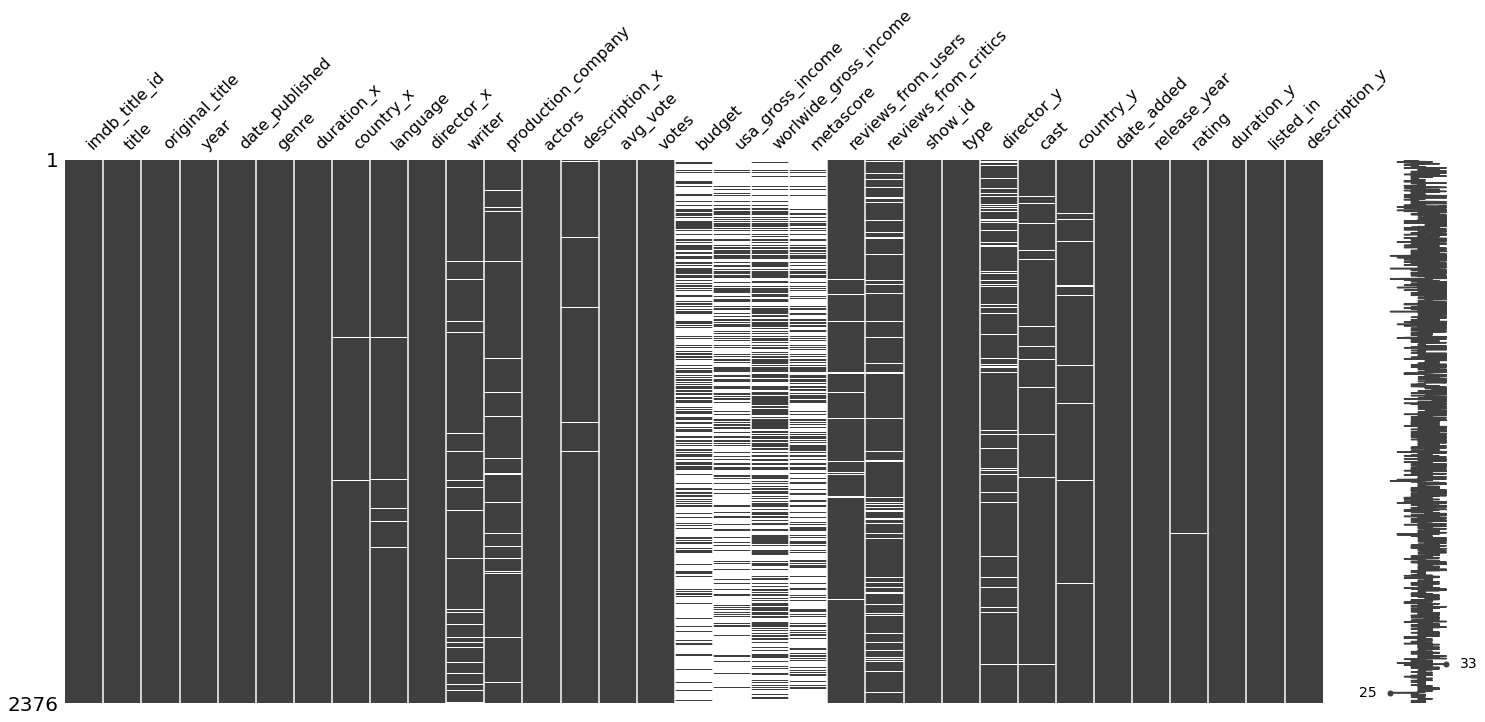

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(result)

In [ ]:
print('Número de valores perdidos por columnas:') 
result.isnull().sum()

Número de valores perdidos por columnas:


imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration_x                  0
country_x                   5
language                   27
director_x                  0
writer                     50
production_company         89
actors                      0
description_x              11
avg_vote                    0
votes                       0
budget                   1577
usa_gross_income         1655
worlwide_gross_income    1154
metascore                1613
reviews_from_users         59
reviews_from_critics      205
show_id                     0
type                        0
director_y                222
cast                       39
country_y                  55
date_added                  1
release_year                0
rating                      1
duration_y                  0
listed_in                   0
description_y               0
dtype: int

Si hay más de 800 valores que faltan, consideramos la posibilidad de suprimirlos

In [ ]:
mostNAdrop = result.loc[:,(result.isna().sum()>800)].columns.tolist()
print(mostNAdrop)

['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore']


In [ ]:
#Tratar cada valor faltante como no disponible
result.director_x.fillna("No Director", inplace=True)
result.cast.fillna("No Cast", inplace=True)
result.country_x.fillna("Country Unavailable", inplace=True)
result.dropna(subset=["avg_vote","language"], inplace=True)
result.description_x.fillna("No Description", inplace=True)
result.budget.fillna("No Budget", inplace=True)
result.rating.fillna("No Rating", inplace=True)

Ahora, vamos a dejar algunas de las columnas más valoradas que faltan, las columnas repetidas y también las columnas que no vamos a utilizar.

In [ ]:
result.drop(["director_y", "country_y","duration_y","description_y","original_title","date_added","year","actors","show_id","writer","usa_gross_income","worlwide_gross_income","metascore","reviews_from_users","reviews_from_critics","production_company","date_published","genre"], axis=1,inplace=True)
result .head(2)

,imdb_title_id,title,duration_x,country_x,language,director_x,description_x,avg_vote,votes,budget,type,cast,release_year,rating,listed_in
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies"
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies"


## **3.3 Etiquetado de columnas**

Una vez que el Dataset esta limpio, se procede a renombrar las columnas para ver los datos de una mejor manera.

In [ ]:
result.rename(columns={"imdb_title_id":"IMDb Title ID","title":"Title","release_year":"Year","listed_in":"Genre","duration_x":"Duration","country_x": "Country","language":"Language","director_x" : "Director", "description_x":"Description","avg_vote":"IMDb Rating","votes":"Votes","budget":"Budget","type":"Type","cast":"Cast","rating":"Rating"}, inplace=True)
result.head(2)

,IMDb Title ID,Title,Duration,Country,Language,Director,Description,IMDb Rating,Votes,Budget,Type,Cast,Year,Rating,Genre
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies"
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies"


In [ ]:
csv = pd.DataFrame(result)
csv.to_csv('dataset_final.csv',index = False)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2959
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDb Title ID  2349 non-null   object 
 1   Title          2349 non-null   object 
 2   Duration       2349 non-null   int64  
 3   Country        2349 non-null   object 
 4   Language       2349 non-null   object 
 5   Director       2349 non-null   object 
 6   Description    2349 non-null   object 
 7   IMDb Rating    2349 non-null   float64
 8   Votes          2349 non-null   int64  
 9   Budget         2349 non-null   object 
 10  Type           2349 non-null   object 
 11  Cast           2349 non-null   object 
 12  Year           2349 non-null   int64  
 13  Rating         2349 non-null   object 
 14  Genre          2349 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 293.6+ KB


# **4 Análisis Exploratorio de Datos**

En primer lugar, visualizamos el Top 10 de películas y el Top 10 de programas de televisión en Netflix por su calificación en IMDb.

## **4.1 Top 10 de peliculas**

In [ ]:
netflix_shows=result[result['Type']=='TV Show'].sort_values(by = 'IMDb Rating', ascending = False)
netflix_movies=result[result['Type']=='Movie'].sort_values(by = 'IMDb Rating', ascending = False)

top10_movies = netflix_movies.sort_values("IMDb Rating", ascending = False)
print('Top 10 de peliculas')
top10_movies[['Title', "IMDb Rating"]][0:10]

Top 10 de peliculas


,Title,IMDb Rating
421,Schindler's List,8.9
441,Pulp Fiction,8.9
1442,Inception,8.8
826,City of God,8.6
469,Seven,8.6
693,Koshish,8.6
240,Gol Maal,8.6
1233,Oththa Seruppu Size 7,8.6
2161,Eh Janam Tumhare Lekhe,8.6
2886,Ani... Dr. Kashinath Ghanekar,8.6


## **4.2 Top 10 de Shows de TV**

In [ ]:
top10_shows = netflix_shows.sort_values("IMDb Rating", ascending = False) 
top10_shows[['Title', "IMDb Rating"]][0:10] 

,Title,IMDb Rating
160,Persona,8.1
802,My Sassy Girl,8.0
939,Trailer Park Boys,7.9
145,Spartacus,7.9
1037,Mind Game,7.8
881,Ray,7.7
2020,1983,7.7
128,Godzilla,7.6
486,Leila,7.6
632,After Life,7.6


## **4.3 Clasificación basada en la edad**

En nuestros datos hay una clasificación orientativa basada en qué grupo de edad debe ver ese contenido. De las palabras clave podemos ver que Niños pequeños se refiere a: Menores de 7 años, Niños mayores: 7+, Adolescentes: 13+, Adultos: 17+ y también hay contenidos que se mencionan como No clasificados. Así pues, este es el gráfico circular del porcentaje de contenido de Netflix para los grupos de edad de referencia.

Clasificación Basada en la edad


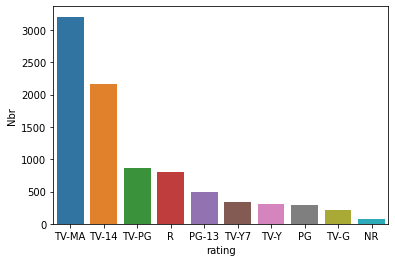

In [ ]:
netflix_rating = dfN['rating'].value_counts()
netflix_rating = pd.DataFrame(netflix_rating).reset_index()
netflix_rating.columns = ['rating','Nbr']
sns.barplot(x = 'rating',y = 'Nbr', data=netflix_rating.head(10));
print('Clasificación Basada en la edad')

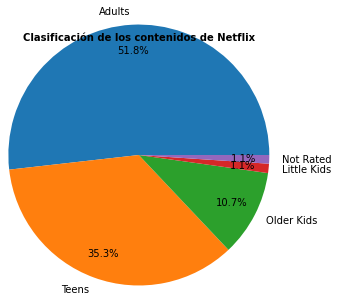

In [ ]:
little_kids=result.Rating.value_counts()['TV-Y']+result.Rating.value_counts()['TV-G']+ result.Rating.value_counts()['G']
older_kids= result.Rating.value_counts()['TV-Y7']+result.Rating.value_counts()['TV-PG']+result.Rating.value_counts()['PG']
teens = result.Rating.value_counts()['TV-14']++result.Rating.value_counts()['PG-13']
adults = result.Rating.value_counts()['TV-MA']+result.Rating.value_counts()['R']+result.Rating.value_counts()['NC-17']
not_rated = result.Rating.value_counts()['NR']+result.Rating.value_counts()['UR']
plt.title('Clasificación de los contenidos de Netflix',fontsize=10,weight='bold')
plt.pie(x=[adults,teens,older_kids,little_kids,not_rated],labels=['Adults','Teens','Older Kids','Little Kids','Not Rated'],autopct='%1.1f%%',radius=1.5,pctdistance=0.8)
plt.show()

Como podemos ver, el contenido es mayoritariamente para el público adulto (51%) que se refiere a mayores de 18 años (maduros).
También hay una gran parte de contenidos para adolescentes si lo comparamos con otros (35%) que no son adecuados para niños menores de 13 años.
El 10% restante es apto para niños menores de 13 años.

En conclusión, alrededor del 85% del contenido de las películas y programas de televisión de Netflix está dirigido a un público mayor de 13 y 17 años. Por lo tanto, son aptos para adolescentes y adultos.

## **4.4 Clasificación de contenido**

A continuacion se presenta un gráfico de barras para la distribución de todas las clasificaciones de contenido por sus cuentas.

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot 
import plotly.graph_objs as go

data = result['IMDb Rating'].value_counts().sort_index(ascending=False)

hold = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / result.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#010203'),
               y = data.values,
               marker = dict(color = '#ff7c00'))

layout = dict(title = 'Distribución de {} clasificaciones de Netflix'.format(result.shape[0]),
              xaxis = dict(title = 'IMDb Rating'),
              yaxis = dict(title = 'Cantidad'))

distfigure = go.Figure(data=[hold], layout=layout)
iplot(distfigure)

La valoración mínima de un contenido en IMDb es de 1,9, mientras que la máxima es de 8,9 sobre 10. Sólo hay 118 votos por debajo de 4 mientras que hay 1569 votos entre la calificación 4-8. Por lo tanto, podemos decir que las valoraciones por debajo de 4 y por encima de 8 se dan menos en comparación con otras valoraciones. Además, las valoraciones más frecuentes de IMDb están entre el 6 y el 7.

## **4.5 Distribución de géneros**

A continuación se presenta un gráfico circular para ver la distribución de los diferentes géneros y sus porcentajes.

In [ ]:
from collections import Counter
eda_result=result.copy()
split_genre = ", ".join(eda_result['Genre']).split(", ")
split_genre = Counter(split_genre).most_common(10)

genrefig = go.Figure(data=[go.Pie(labels=[_[0] for _ in split_genre][::-1], values=[_[1] for _ in split_genre][::-1], 
                textinfo='label')], layout=go.Layout(title="Contenidos por género"))
genrefig.show()

Los tres géneros dominantes en Netflix son las comedias (13%), las películas internacionales (23%) y los dramas (24%). Pero también sabemos que una película o programa de televisión puede ser tanto comedia como drama o internacional y comedia, etc. Un contenido es internacional si no es de Estados Unidos.

## **4.6 Valoracion por género**

A continuacion un gráfico de caja para analizar la valoración media por Género.

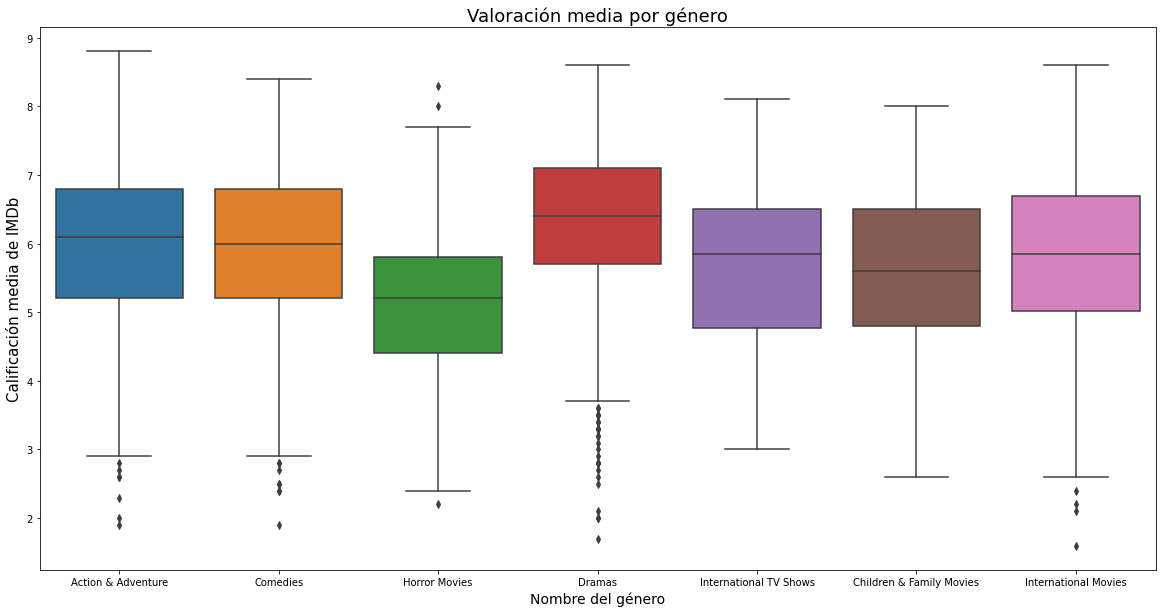

In [ ]:
eda_result['firstword_genre'] = eda_result['Genre'].str.split(',').str[0]
count = eda_result['firstword_genre'].value_counts()[:7]
top_genres = list(count.index)
genreratingbox = eda_result[eda_result['firstword_genre'].isin(top_genres)]
genreratingbox = genreratingbox[['firstword_genre', 'IMDb Rating', 'Votes']]

plt.figure(figsize=(20, 10))
sns.boxplot(x='firstword_genre', y='IMDb Rating', data=genreratingbox)
plt.xlabel("Nombre del género",fontsize=14)
plt.ylabel("Calificación media de IMDb",fontsize=15)
plt.title("Valoración media por género", fontsize=18)
plt.show()

Como se puede observar no hay diferencias significativas entre la distribución de la calificación de los géneros, generalmente se califican en torno al 6. La única diferencia significativa es en las películas de terror, que se clasifican en torno a 5.

## **4.7 Relacion entre votos y calificaciones de IMDb**

Muestra de la relación entre los votos y las calificaciones de IMDb

(0.0, 10.0)

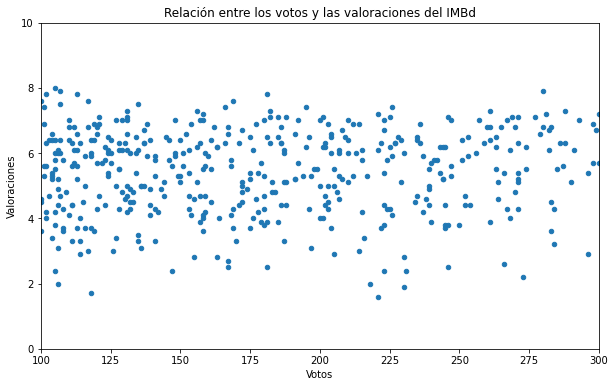

In [ ]:
ax=result.plot.scatter(x ='Votes', y ='IMDb Rating',figsize=(10,6)) 
ax.set_ylabel("Valoraciones")
ax.set_xlabel("Votos")
ax.set_title("Relación entre los votos y las valoraciones del IMBd")
ax.set_xlim((100, 300))
ax.set_ylim((0, 10))

## **4.8 Relación entre la duración y las calificaciones de IMDb.**

Muestra de la relación entre la duración y las calificaciones de IMDb. 

El valor R de Pearson para la duración y la valoración es de 0,48, mientras que el valor R de Spearman es de 0,52. Los contenidos que tienen una duración de entre 75 y 125 minutos son los más votados, lo que también muestra que la mayoría de los contenidos tienen una duración de entre 75 y 125 minutos. La razón por la que el coeficiente de correlación de Spearman es mayor que el de Pearson es la intensidad en el área de 75-125.

(0.0, 10.0)

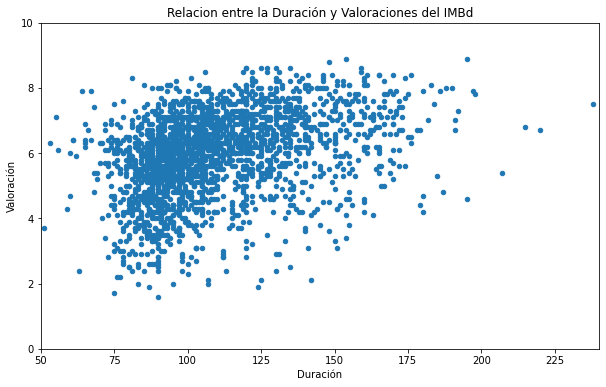

In [ ]:
ax=result.plot.scatter(x ='Duration', y ='IMDb Rating',figsize=(10,6)) 
ax.set_ylabel("Valoración")
ax.set_xlabel("Duración")
ax.set_title("Relacion entre la Duración y Valoraciones del IMBd")
ax.set_xlim((50, 240))
ax.set_ylim((0, 10))

Estas variables muestran los valores medios de los contenidos que tienen una duración entre 75-100 minutos y los contenidos que tienen una duración entre 100-125 minutos. La valoración media de IMDb para los contenidos de 75-100 minutos es de 5,4 mientras que la valoración de 6,2 para los contenidos de 100-125 minutos, la diferencia es de 0,8.Lo que concuerda con la observación ampírica realizada en el gráfico de correlación.

In [ ]:
result125=result[result["Duration"]<=125]
result100_125=result125[result125["Duration"]>=100]
result100_125.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Duration         110.555283
IMDb Rating        6.165848
Votes          34829.367322
Year            2013.556511
dtype: float64

In [ ]:
result75=result[result["Duration"]>=75]
result75_100=result75[result75["Duration"]<=100]
result75_100.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Duration          90.386296
IMDb Rating        5.452135
Votes          14438.949355
Year            2014.847071
dtype: float64

## **4.9 Relación entre calificacion IMDb y el Orígen**

Este gráfico muestra la relación entre la calificación IMDb y el país. La mayoría de las películas que tienen una calificación IMDb superior a 8 son originarias de la India y Estados Unidos.

(0.0, 10.0)

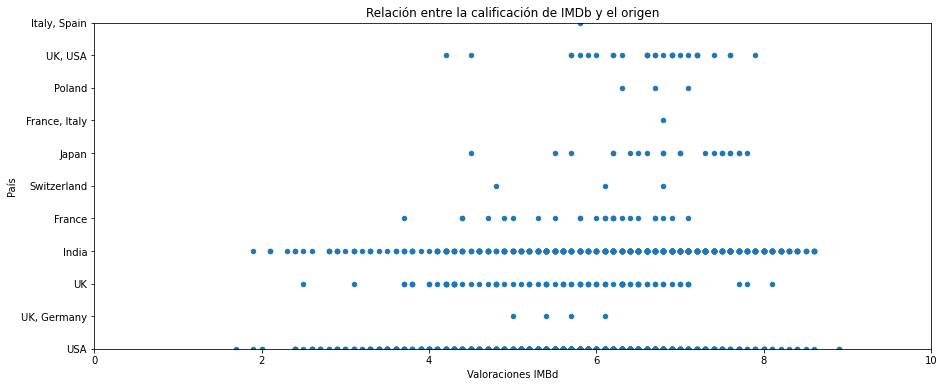

In [ ]:
ax=result.plot.scatter(x ='IMDb Rating', y ='Country',figsize=(15,6)) 
ax.set_ylabel("País")
ax.set_xlabel("Valoraciones IMBd")
ax.set_title("Relación entre la calificación de IMDb y el origen")
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

## **4.10 Relación entre la duracion y el Orígen**

La mayoría de los contenidos tienen una duración de entre 75 y 125 minutos, sólo los contenidos indios tienen una mayoría de hasta 180 minutos.

(0.0, 10.0)

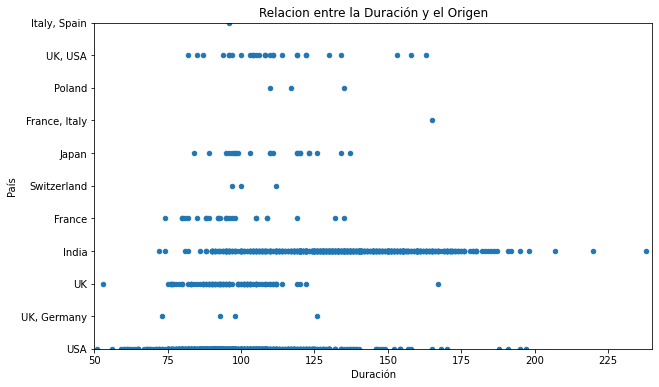

In [ ]:
ax=result.plot.scatter(x ='Duration', y ='Country',figsize=(10,6)) 
ax.set_ylabel("País")
ax.set_xlabel("Duración")
ax.set_title("Relacion entre la Duración y el Origen")
ax.set_xlim((50, 240))
ax.set_ylim((0, 10))